# Statistical Thinking in Python (Part 1)

---

***Pensamiento estadístico en Python (Parte 1)*** 

---

Después de todo el arduo trabajo de adquirir datos y convertirlos en una forma con la que pueda trabajar, en última instancia, desea sacar conclusiones claras y concisas a partir de ellos. Este último paso crucial de un proceso de análisis de datos depende de los principios de la inferencia estadística. En este curso, comenzará a construir la base que necesita para pensar estadísticamente, hablar el idioma de sus datos y comprender lo que le dicen sus datos. Los cimientos del pensamiento estadístico tardaron décadas en construirse, pero hoy en día se pueden comprender mucho más rápido con la ayuda de las computadoras. Con el poder de las herramientas basadas en Python, rápidamente se pondrá al día y comenzará a pensar estadísticamente al final de este curso.

In [ ]:
import numpy as np
import pandas as pd
df_swing = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/21.%20Statistical%20Thinking%20in%20Python%20(Part%201)/dataset/2008_swing_states.csv')
belmont = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/21.%20Statistical%20Thinking%20in%20Python%20(Part%201)/dataset/belmont.csv')

## 1. Graphical Exploratory Data Analysis


**(Análisis de datos exploratorios gráficos)**

Antes de sumergirse en técnicas sofisticadas de inferencia estadística, primero debe explorar sus datos trazándolos y calculando estadísticas de resumen simples. Este proceso, llamado análisis exploratorio de datos, es un primer paso crucial en el análisis estadístico de datos. 

In [ ]:
import pandas as pd
df_swing = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/21.%20Statistical%20Thinking%20in%20Python%20(Part%201)/dataset/2008_swing_states.csv')
df_swing.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


In [ ]:
df_swing[['state','county','dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


### Introduction to Exploratory Data Analysis

### Plotting a histogram

In [ ]:
df_swing

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04
...,...,...,...,...,...,...
217,OH,Hamilton County,425086,225213,195530,53.53
218,OH,Highland County,19186,6856,11907,36.54
219,OH,Hocking County,12961,6259,6364,49.58
220,OH,Licking County,82356,33932,46918,41.97


14


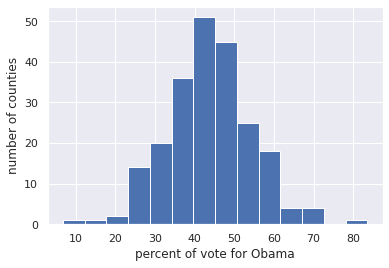

In [ ]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set default Seaborn style
sns.set()

# Compute number of data points: n_data
n_data = len(df_swing['dem_share'])

# Number of bins is the square root of number of data points: n_bins
n_bins= np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)
print(n_bins)

# Plot histogram of versicolor petal lengths
_= plt.hist(df_swing['dem_share'],bins=n_bins)
_= plt.xlabel('percent of vote for Obama')
_= plt.ylabel('number of counties')

# Show histogram
plt.show()

### Plot all of your data: Bee swarm plots

**DIAGRAMA DE ENGRANAJE**

In [ ]:
# sns.swarmplot?
# help(sns.swarmplot)

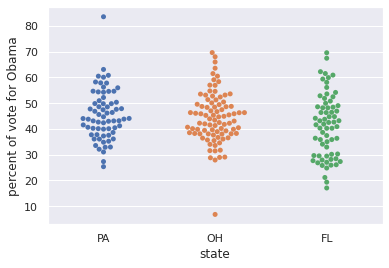

In [ ]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

### Plot all of your data: ECDFs

**ECDF'S <> FUNCION DE DISTRIBUCION ACUMULATIVA EMPIRICA**

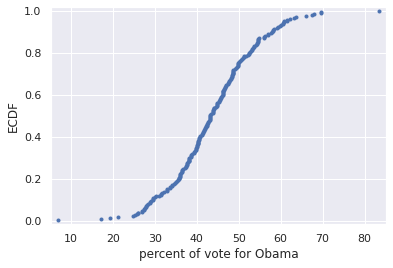

In [ ]:
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)
_= plt.plot(x, y, marker='.', linestyle='none')
_= plt.xlabel('percent of vote for Obama')
_= plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,len(x)+1) / n

    return x, y

In [ ]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


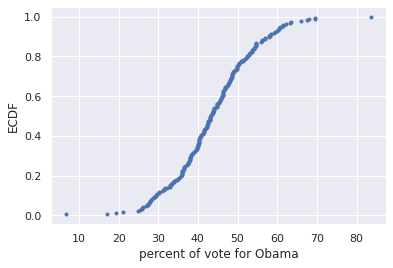

In [ ]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_, y_ = ecdf(df_swing['dem_share'])

# Generate plot
_= plt.plot(x_, y_, marker='.', linestyle='none')

# Label the axes
_= plt.xlabel('percent of vote for Obama')
_= plt.ylabel('ECDF')

# Display the plot
plt.show()

In [ ]:
state_PA = df_swing[df_swing['state'] == "PA"]
state_OH = df_swing[df_swing['state'] == "OH"]
state_FL = df_swing[df_swing['state'] == "FL"]
len(state_OH)

88

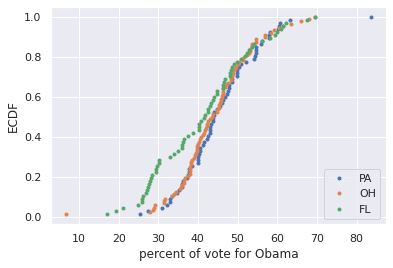

In [ ]:
# Compute ECDFs
x_pa, y_pa = ecdf(state_PA['dem_share'])
x_oh, y_oh = ecdf(state_OH['dem_share'])
x_fl, y_fl = ecdf(state_FL['dem_share'])

# Plot all ECDFs on the same plot
_= plt.plot(x_pa, y_pa, marker='.', linestyle='none')
_= plt.plot(x_oh, y_oh, marker='.', linestyle='none')
_= plt.plot(x_fl, y_fl, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('PA', 'OH', 'FL'), loc='lower right')
_= plt.xlabel('percent of vote for Obama')
_= plt.ylabel('ECDF')

# Display the plot
plt.show()

## 2. Quantitative Exploratory Data Analysis

En este capítulo, calculará estadísticas resumidas útiles, que sirven para describir de manera concisa las características más destacadas de un conjunto de datos con unos pocos números.

In [ ]:
np.mean(df_swing['dem_share']) # MEDIA

43.76441441441444

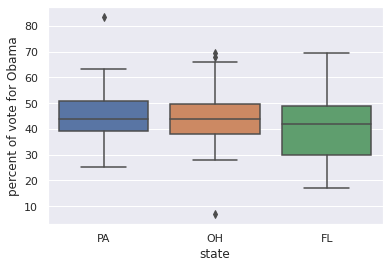

In [ ]:
_ = sns.boxplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

### Percentiles, outliers, and box plots

In [ ]:
percentiles = [2.5, 25, 50, 75, 97.5]
percentil_share = np.percentile(df_swing['dem_share'], percentiles)
percentil_share

array([25.58675, 37.3025 , 43.185  , 49.925  , 64.7195 ])

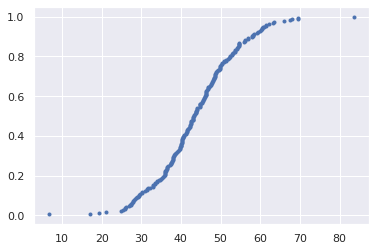

In [ ]:
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)
_= plt.plot(x, y, marker='.', linestyle='none')

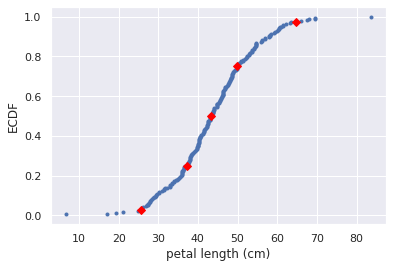

In [ ]:
# Plot the ECDF
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(percentil_share, np.array(percentiles)/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

### Variance and standard deviation

In [ ]:
# Array of differences to mean: differences
differences = df_swing['dem_share'] - np.mean(df_swing['dem_share'])

# Square the differences: diff_sq
diff_sq = [x**2 for x in  differences]

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(df_swing['dem_share'])

# Print the results
print(variance_explicit,variance_np)

114.2464949273598 114.24649492735986


In [ ]:
# Compute the variance: variance
variance = np.var(df_swing['dem_share'])

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(df_swing['dem_share']))

10.68861520157592
10.68861520157592


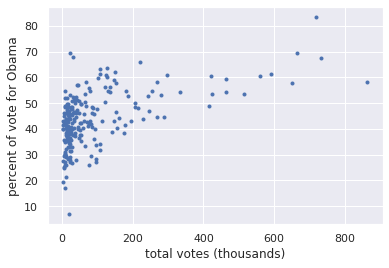

In [ ]:
# Make a scatter plot
_ = plt.plot(df_swing['total_votes']/1000, df_swing['dem_share'], marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

# Show the result
plt.show()

In [ ]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix =np.cov(df_swing['total_votes']/1000,df_swing['dem_share'])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of dem_share: dem_share_cov
dem_share_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(dem_share_cov)

[[20245.10393632   817.30936184]
 [  817.30936184   114.76344739]]
817.3093618405288


In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(df_swing['total_votes']/1000,df_swing['dem_share'])

# Print the result
print(r)

0.5361973649586781


## 3. Thinking Probabilistically-- Discrete Variables

La inferencia estadística se basa en la probabilidad. Debido a que muy pocas veces podemos decir algo significativo con absoluta certeza a partir de los datos, usamos un lenguaje probabilístico para hacer declaraciones cuantitativas sobre los datos. En este capítulo, aprenderá a pensar de manera probabilística sobre cantidades discretas: aquellas que solo pueden tomar ciertos valores, como números enteros. 

### Probabilistic logic and statistical inference

In [ ]:
# FULL TEORIA

### Random number generators and hacker statistics

In [ ]:
# Nos da un # entre 0 y 1 con la misma probabilidad de ocurrir

np.random.seed(42)
random_number = np.random.random(size=4)
random_number

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [ ]:
heads = random_number <0.5
heads

array([ True, False, False, False])

In [ ]:
np.sum(heads)

1

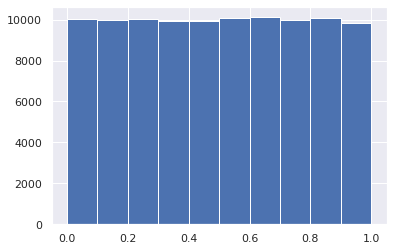

In [ ]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers (empty array)
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

In [ ]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        num = np.random.random()

        # If less than p, it's a success so add one to n_success
        if num < p:
            n_success += 1

    return n_success

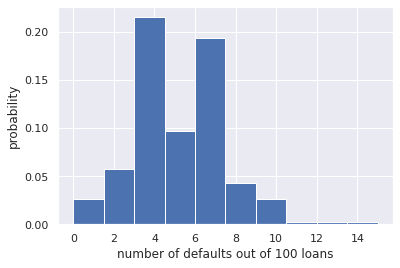

In [ ]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True) # normed = True
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

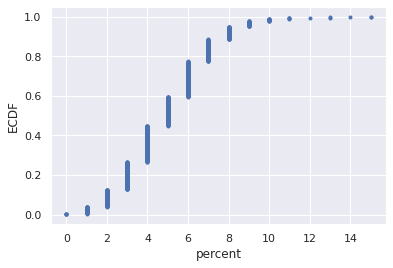

Probability of losing money = 0.022


In [ ]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_= plt.plot(x, y, marker='.', linestyle='none')
_= plt.xlabel('percent')
_= plt.ylabel('ECDF')
plt.show()

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum (n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Probability distributions and stories: The Binomial distribution


**PMF <> FUNCION DE MASA PROBABILIDAD**

Conjunto de probabilidades de resultados discretos


**DUD <> BINOMIAL**

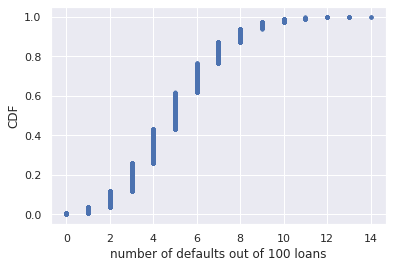

In [ ]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_= plt.plot(x, y, marker='.', linestyle='none')
_= plt.xlabel('number of defaults out of 100 loans')
_= plt.ylabel('CDF')


# Show the plot
plt.show()


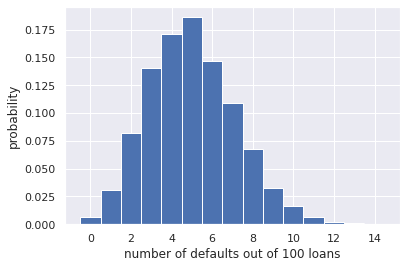

In [ ]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins) # normed = True

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

### Poisson processes and the Poisson distribution

In [ ]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i],size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


In [ ]:
# ¡Correcto! Cuando tenemos eventos raros (p bajo, n alto), la distribución Binomial es Poisson. Esto tiene un solo parámetro, 
# vel número medio de éxitos por intervalo de tiempo, en nuestro caso el número medio de juegos sin hits por temporada.

In [ ]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


## 4. Thinking Probabilistically-- Continuous Variables

Es hora de pasar a las variables continuas, como las que pueden tomar cualquier valor fraccionario. Muchos de los principios son los mismos, pero hay algunas sutilezas. Al final de este capítulo final, hablará el lenguaje probabilístico que necesita para iniciar las técnicas de inferencia que se tratan en la secuela de este curso.

### Probability density functions

In [ ]:
# FULL TEORIA

### Introduction to the Normal distribution

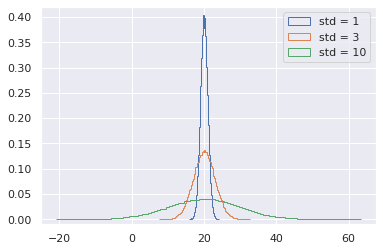

In [ ]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density = True,histtype='step' )
_ = plt.hist(samples_std3, bins=100, density = True,histtype='step' )
_ = plt.hist(samples_std10, bins=100, density = True,histtype='step' )

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


¡Buen trabajo! Puede ver cómo las diferentes desviaciones estándar dan como resultado archivos PDF de diferentes anchos. Todos los picos están centrados en la media de 20.

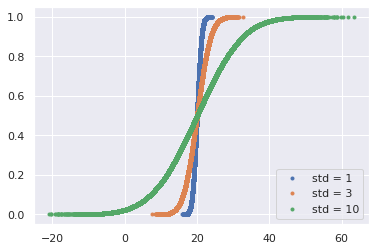

In [ ]:
# The Normal CDF

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_= plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_= plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_= plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

¡Buen trabajo! Todas las CDF pasan por la media en el percentil 50; la media y la mediana de una distribución normal son iguales. El ancho de la CDF varía con la desviación estándar.

In [ ]:
belmont_no_outliers =np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

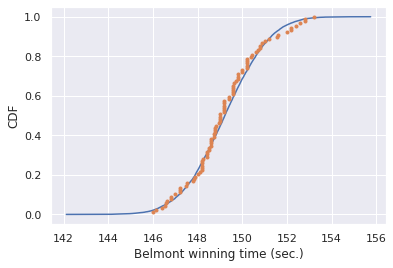

In [ ]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

El CDF teórico y el ECDF de los datos sugieren que los tiempos Belmont ganadores están, de hecho, normalmente distribuidos. Esto también sugiere que en los últimos 100 años más o menos, no ha habido grandes avances tecnológicos o de entrenamiento que hayan afectado significativamente la velocidad a la que los caballos pueden correr esta carrera.

In [ ]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu,sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000658


¡Buen trabajo! Tuvimos que tomar un millón de muestras porque la probabilidad de un tiempo rápido es muy baja y teníamos que asegurarnos de muestrear lo suficiente. Sabemos que solo hay un 0,06% de posibilidades de que un caballo corra por el Belmont tan rápido como la Secretaría.

### The Normal distribution: Properties and warnings

In [ ]:
# La distribución exponencial describe los tiempos de espera entre eventos raros

### The Exponential distribution

In [ ]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

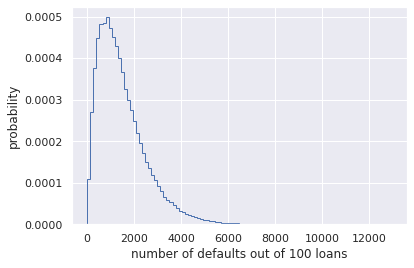

In [ ]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764,715,size=100000)

# Make the histogram
_ = plt.hist(waiting_times, density=True, bins=100,histtype='step') # normed = True 

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

¡Buen trabajo! Observe que el PDF tiene su punto máximo, a diferencia del tiempo de espera para un solo proceso de Poisson. Para divertirse (e iluminarse), les animo a que también tracen el CDF.